In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string
import gensim

from gensim.models.phrases import Phraser,Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook ,output_file
from bokeh.plotting import show , figure
%matplotlib inline

[nltk_data] Error loading gutenberg: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# 自然語言資料的預處理

In [2]:
#project gutenberg database
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
#單字數量
len(gutenberg.words())

2621613

In [9]:
#斷句處理
gberg_sent_tokens = sent_tokenize(gutenberg.raw())
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [10]:
#斷字處理
word_tokenize(gberg_sent_tokens[1])
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [3]:
#斷字+斷句
gberg_sents = gutenberg.sents()
gberg_sents[0:3]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I']]

In [11]:
#大寫轉小寫
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
#移除停用字與標點符號
stpwrds = stopwords.words('english') + list(string.punctuation) 
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [13]:
#字根提取
stemmer = PorterStemmer()
[stemmer.stem(w.lower()) for w in gberg_sents[4] 
    if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

In [15]:
#2-gram詞彙檢測並建立一個叫bigram的特殊物件
phrases = Phrases(gberg_sents)
bigram = Phraser(phrases)
#建立2-gram字典物件
bigram.phrasegrams 

{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [18]:
#test bigram
test_sentence = 'Miss Taylor has two daughters'.split()
bigram[test_sentence]

['Miss_Taylor', 'has', 'two_daughters']

In [19]:
#去大寫、標點符號
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()
                        not in list(string.punctuation)])

In [20]:
#建立2-gram詞彙物件
lower_bigram = Phraser(Phrases(lower_sents))
lower_bigram.phrasegrams

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [21]:
#進一步過濾2-gram
lower_bigram = Phraser(Phrases(lower_sents,
                              min_count=32 , threshold=64))
lower_bigram.phrasegrams

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [22]:
#將所有2-gram串成單一詞彙
clean_sents = [] #建立空串列來存放結果
for s in lower_sents:
    clean_sents.append(lower_bigram[s])
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

# 用 word2vec 建立詞向量空間

In [26]:
#SG適合小型資料庫，CBOW反之
model = Word2Vec(sentences=clean_sents, vector_size=64, 
                  sg=1, window=10, epochs=5,
                  min_count=10, workers=4)

In [34]:
#建立詞向量空間模型物件
model = gensim.models.Word2Vec.load('D:\桌面\data science\Deep learning\Ch11\ch11-clean_gutenberg_model.w2v')
#查看模型內容
len(model.wv.key_to_index)

10329

In [33]:
model.wv['dog']

array([ 0.38401067,  0.01232518, -0.37594706, -0.00112308,  0.38663676,
        0.01287549,  0.398965  ,  0.0096426 , -0.10419296, -0.02877572,
        0.3207022 ,  0.27838793,  0.62772304,  0.34408906,  0.23356602,
        0.24557391,  0.3398472 ,  0.07168821, -0.18941355, -0.10122284,
       -0.35172758,  0.4038952 , -0.12179806,  0.096336  ,  0.00641343,
        0.02332107,  0.7743452 ,  0.03591069, -0.20103034, -0.1688079 ,
       -0.01331445, -0.29832968,  0.08522387, -0.02750671,  0.32494134,
       -0.14266558, -0.4192913 , -0.09291836, -0.23813559,  0.38258648,
        0.11036541,  0.005807  , -0.16745028,  0.34308755, -0.20224966,
       -0.77683043,  0.05146591, -0.5883941 , -0.0718769 , -0.18120563,
        0.00358319, -0.29351747,  0.153776  ,  0.48048878,  0.22479494,
        0.5465321 ,  0.29695514,  0.00986911, -0.2450937 , -0.19344331,
        0.3541134 ,  0.3426432 , -0.10496043,  0.00543602], dtype=float32)

In [36]:
#評估生成的詞向量
model.wv.most_similar('father', topn=3) #找出與father最接近的字

'dog'

In [37]:
model.wv.doesnt_match('mother father sister brother dog'.split()) #找出最不同的字

'dog'

In [38]:
model.wv.similarity('father', 'dog') #相似度分數

0.44234338

In [39]:
model.wv.most_similar(positive=['father','woman'], negative=['man'])

[('mother', 0.7650133371353149),
 ('husband', 0.7556627988815308),
 ('sister', 0.7482179999351501),
 ('daughter', 0.7390403151512146),
 ('wife', 0.7284982204437256),
 ('sarah', 0.6856438517570496),
 ('daughters', 0.6652647256851196),
 ('conceived', 0.6637863516807556),
 ('rebekah', 0.6580978035926819),
 ('dearly', 0.6398963928222656)]

In [40]:
model.wv.most_similar(positive=['husband', 'woman'],
                     negative=['man'])

[('wife', 0.7075265645980835),
 ('sister', 0.6973984837532043),
 ('maid', 0.6911259293556213),
 ('daughter', 0.6799545288085938),
 ('mother', 0.6583081483840942),
 ('child', 0.6433471441268921),
 ('conceived', 0.6391384601593018),
 ('harlot', 0.6089693903923035),
 ('daughters', 0.6069822907447815),
 ('marriage', 0.5894293785095215)]

In [43]:
#將詞向量空間描繪出來
#用t-SNE進行降維
tsne = TSNE(n_components=2 , n_iter=1000) #降為2維 ，訓練週期1000
X_2d = tsne.fit_transform(model.wv[model.wv.key_to_index])
coords_df =pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index.keys() 
#存成CSV
coords_df.to_csv('clean_gutenberg_tsne.csv' , index= False)

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [44]:
coords_df.head()

,x,y,token
0,50.053505,-37.846516,emma
1,-21.049120,-45.698360,by
2,48.535751,-40.027893,jane
3,3.464664,-23.963114,volume
4,1.442286,-38.067398,i


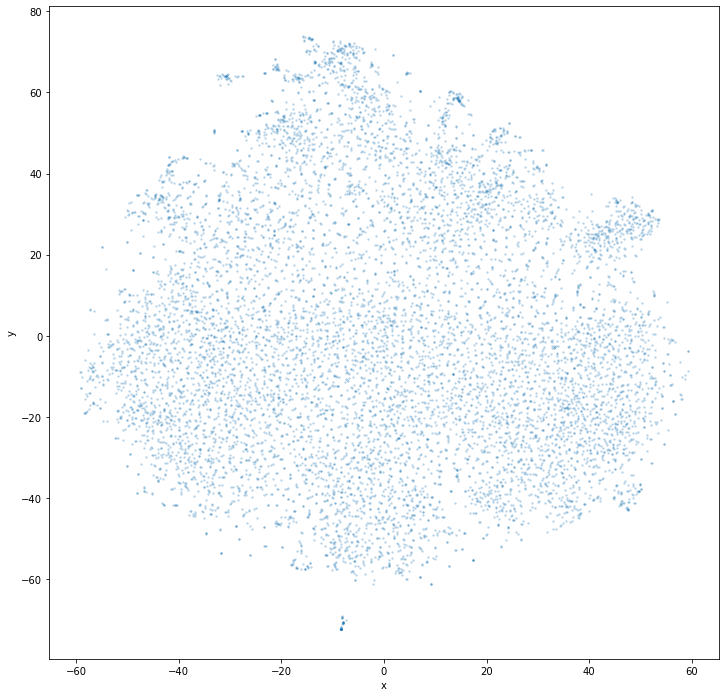

In [45]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10 , alpha = 0.2)

In [46]:
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800 , plot_height=800)
_=p.text(x=subset_df.x, y=subset_df.y,text=subset_df.token)
show(p)

Loading BokehJS ...